In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import time

In [ ]:
X,y=make_classification(n_samples=1000,n_features=200,random_state=42)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 42)

In [ ]:
from sklearn.metrics import accuracy_score
gb_model=GradientBoostingClassifier(random_state=42)
xgb_model=xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_matriic='logloss')
start_gb=time.time()
gb_model.fit(x_train,y_train)
end_gb=time.time()
gb_time=end_gb-start_gb
gb_predictions=gb_model.predict(x_test)
gb_accuracy=accuracy_score(y_test,gb_predictions)


In [ ]:
#xg boost:
start_xgb=time.time()
xgb_model.fit(x_train,y_train)
end_xgb=time.time()
xgb_time=end_xgb-start_xgb
xgb_predictions=xgb_model.predict(x_test)
xgb_accuracy=accuracy_score(y_test,xgb_predictions)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_matriic" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(xgb_time,gb_time)

1.122925043106079 9.81719183921814


In [ ]:
print(xgb_accuracy,gb_accuracy)

0.875 0.85


In [ ]:
n=[100,1000,10000,100000]
f=200
time_gb=[]
accuracy_xg=[]
accuracy_gb=[]
time_xg=[]
for i in n:
  X,y=make_classification(n_samples=i,n_features=200,random_state=42)
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 42)
  gb_model=GradientBoostingClassifier(random_state=42)
  xgb_model=xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_matriic='logloss')
  start_gb=time.time()
  gb_model.fit(x_train,y_train)
  end_gb=time.time()
  gb_time=end_gb-start_gb
  gb_predictions=gb_model.predict(x_test)
  gb_accuracy=accuracy_score(y_test,gb_predictions)
    #xg boost:
  start_xgb=time.time()
  xgb_model.fit(x_train,y_train)
  end_xgb=time.time()
  xgb_time=end_xgb-start_xgb
  xgb_predictions=xgb_model.predict(x_test)
  xgb_accuracy=accuracy_score(y_test,xgb_predictions)
  time_gb.append(gb_time)
  time_xg.append(xgb_time)
  accuracy_xg.append(xgb_accuracy)
  accuracy_gb.append(gb_accuracy)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_matriic" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_matriic" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_matriic" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:39:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_matriic" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
time_xg

[0.04190325736999512, 2.948838949203491, 6.971016883850098, 18.13682198524475]

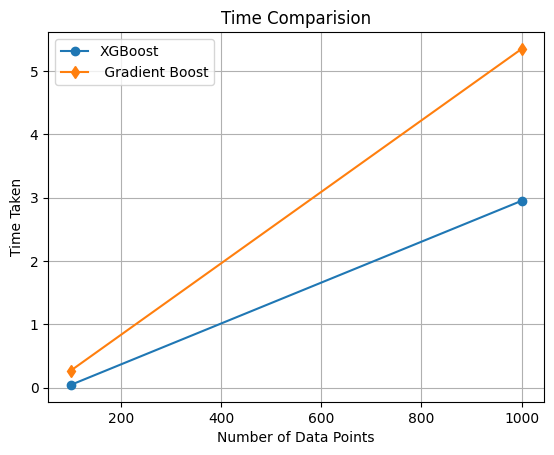

In [ ]:
import matplotlib.pyplot as plt



plt.plot(n[:2], time_xg[:2],marker='o', label='XGBoost')


plt.plot(n[:2], time_gb[:2],marker='d',label=' Gradient Boost')

# Add a legend to distinguish the lines
plt.legend()

# Add titles and labels
plt.title('Time Comparision')
plt.xlabel('Number of Data Points')
plt.ylabel('Time Taken')
plt.grid()
# Show the plot
plt.show()


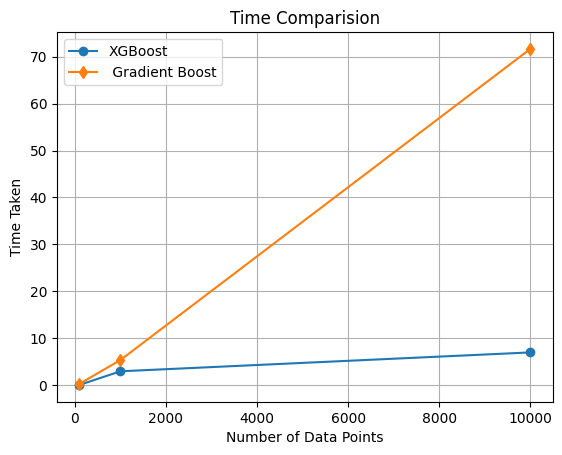

In [ ]:
import matplotlib.pyplot as plt



plt.plot(n[:3], time_xg[:3],marker='o', label='XGBoost')


plt.plot(n[:3], time_gb[:3],marker='d',label=' Gradient Boost')

# Add a legend to distinguish the lines
plt.legend()

# Add titles and labels
plt.title('Time Comparision')
plt.xlabel('Number of Data Points')
plt.ylabel('Time Taken')
plt.grid()
# Show the plot
plt.show()

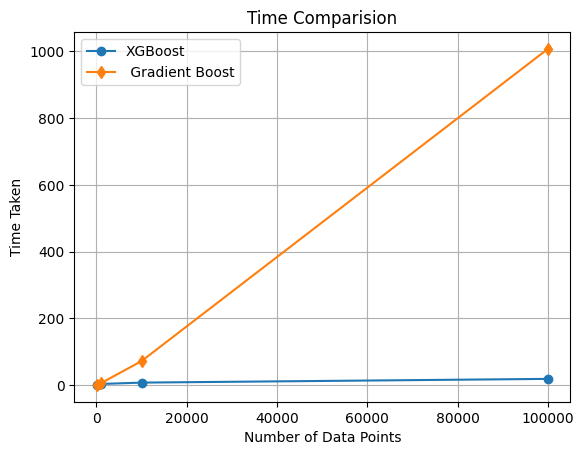

In [ ]:
import matplotlib.pyplot as plt



plt.plot(n, time_xg,marker='o', label='XGBoost')


plt.plot(n, time_gb,marker='d',label=' Gradient Boost')

# Add a legend to distinguish the lines
plt.legend()

# Add titles and labels
plt.title('Time Comparision')
plt.xlabel('Number of Data Points')
plt.ylabel('Time Taken')
plt.grid()
# Show the plot
plt.show()

In [ ]:
from tabulate import tabulate

def create_table(data1, data2, data3):
    table = []
    for i, (item1, item2, item3) in enumerate(zip(data1, data2, data3), start=1):
        table.append([i, item1, item2, item3])
    return table





table_data = create_table(n,time_xg, time_gb)
headers = ["Sr No",'Data Points', "Time XGBoost", "Time Gradient Boost"]

print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+-------+-------------+---------------------+---------------------+
| Sr No | Data Points |    Time XGBoost     | Time Gradient Boost |
+-------+-------------+---------------------+---------------------+
|   1   |     100     | 0.04190325736999512 | 0.2668020725250244  |
|   2   |    1000     |  2.948838949203491  | 5.3467936515808105  |
|   3   |    10000    |  6.971016883850098  |  71.6635754108429   |
|   4   |   100000    |  18.13682198524475  | 1007.5712835788727  |
+-------+-------------+---------------------+---------------------+


In [ ]:

table_data = create_table(n,accuracy_xg, accuracy_gb)
headers = ["Sr No",'Data Points', "Accuracy XGBoost", "Accuracy Gradient Boost"]
print(tabulate(table_data, headers=headers, tablefmt="pretty"))

+-------+-------------+------------------+-------------------------+
| Sr No | Data Points | Accuracy XGBoost | Accuracy Gradient Boost |
+-------+-------------+------------------+-------------------------+
|   1   |     100     |       0.95       |           0.8           |
|   2   |    1000     |      0.875       |          0.85           |
|   3   |    10000    |      0.935       |         0.9325          |
|   4   |   100000    |      0.8668      |         0.8735          |
+-------+-------------+------------------+-------------------------+
